In [ ]:
from sklearn.preprocessing import RobustScaler
from datetime import datetime
import pandas as pd
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Set up logging
logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [ ]:
filepath = "data/cleaned_modv2.csv"
data = pd.read_csv(filepath)
df = data.copy()
df.head()

,user_id,age,gender,music,artist_name,featured_artists,genre,plays,duration,music_id,...,speechiness,instrumentalness,liveness,valence,tempo,time_signature,release_date,explicit,age_group,release_year
0,83811,16,F,Bank Account,21 Savage,"Birdy, Zoé",Dark Trap,11,3.67,2fQrGHiQOvpL9UgPvtYy6G,...,0.351000,0.000007,0.087100,0.376000,75.016000,4.0,2017-09-23,True,Gen Z,2017
1,83811,16,F,Little Talks,Of Monsters and Men,"Ninho, Snoop Dogg, Russ, Paramore",Unknown,686,4.44,2ihCaVdNZmnHZWt0fvAM7B,...,0.032200,0.000000,0.284500,0.413000,101.890500,4.0,2013-04-12,False,Gen Z,2013
2,13397,17,M,Wherever I Go,OneRepublic,"Keith Urban, DJ Khaled, NIKI, MF DOOM",Unknown,136,2.83,46jLy47W8rkf8rEX04gMKB,...,0.089400,0.043432,0.273133,0.404183,120.850500,4.0,2009-02-03,False,Gen Z,2009
3,70645,44,M,No New Friends,DJ Khaled,"The xx, LIT killah",Pop,230,5.14,5oVlbbiKGdGeZkWCFy0mqk,...,0.167000,0.000000,0.096600,0.400000,109.283000,4.0,2017-01-01,False,Gen X,2017
4,70645,44,M,Dreams,Campsite Dream,NaN,Country,391,3.20,1SNoSoQ3JZldOhzBY9gw0n,...,0.078837,0.235527,0.180354,0.380815,120.488479,4.0,1974,False,Gen X,1974


In [ ]:
# 1. correct encoding of user ids with hashing
# 2. correct encoding of music ids with hashing
# 3. verify number of unique users and songs match by shape

In [ ]:
# Step 1: Check for unique music_ids
unique_music_ids = df["music_id"].nunique()
total_rows = len(df)
if unique_music_ids != total_rows:
    logging.warning(
        f"Mismatch in music_ids: Expected {total_rows} unique IDs but found {unique_music_ids}"
    )
    # Assuming we need to rehash music_ids
    df["music_id"] = df["music"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
    logging.info("Rehashed music_ids to ensure uniqueness.")
else:
    logging.info("All music_ids are unique.")

# Debug: Show the updated data after rehashing music_ids (if needed)
print("\nData after music_id rehashing:")
df.head()

# Step 2: Restructure user_ids
unique_users = df["user_id"].unique()
user_id_mapping = {
    old_id: new_id for new_id, old_id in enumerate(unique_users, start=1)
}

# Apply the mapping to create new user_ids
df["new_user_id"] = df["user_id"].map(user_id_mapping)

# Debug: Show the updated data after restructuring user_ids
print("\nData after user_id restructuration:")
df.head()


# Optional Step 3: Hash new_user_ids for robustness
def hash_user_id(user_id):
    return hashlib.sha256(str(user_id).encode()).hexdigest()


df["hashed_user_id"] = df["new_user_id"].apply(hash_user_id)

# Debug: Show the final data after hashing user_ids (if needed)
print("\nFinal data after hashing user_ids:")
df.head()

2024-11-19 14:46:16,438 - INFO - All music_ids are unique.



Data after music_id rehashing:

Data after user_id restructuration:

Final data after hashing user_ids:


,user_id,age,gender,music,artist_name,featured_artists,genre,plays,duration,music_id,...,liveness,valence,tempo,time_signature,release_date,explicit,age_group,release_year,new_user_id,hashed_user_id
0,83811,16,F,Bank Account,21 Savage,"Birdy, Zoé",Dark Trap,11,3.67,2fQrGHiQOvpL9UgPvtYy6G,...,0.087100,0.376000,75.016000,4.0,2017-09-23,True,Gen Z,2017,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1,83811,16,F,Little Talks,Of Monsters and Men,"Ninho, Snoop Dogg, Russ, Paramore",Unknown,686,4.44,2ihCaVdNZmnHZWt0fvAM7B,...,0.284500,0.413000,101.890500,4.0,2013-04-12,False,Gen Z,2013,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2,13397,17,M,Wherever I Go,OneRepublic,"Keith Urban, DJ Khaled, NIKI, MF DOOM",Unknown,136,2.83,46jLy47W8rkf8rEX04gMKB,...,0.273133,0.404183,120.850500,4.0,2009-02-03,False,Gen Z,2009,2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,70645,44,M,No New Friends,DJ Khaled,"The xx, LIT killah",Pop,230,5.14,5oVlbbiKGdGeZkWCFy0mqk,...,0.096600,0.400000,109.283000,4.0,2017-01-01,False,Gen X,2017,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
4,70645,44,M,Dreams,Campsite Dream,NaN,Country,391,3.20,1SNoSoQ3JZldOhzBY9gw0n,...,0.180354,0.380815,120.488479,4.0,1974,False,Gen X,1974,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...


In [ ]:
df["music_id"].nunique(), df["music"].nunique()
print(
    f'Number of unique users: {df["music_id"].nunique()}\nNumber of unique songs: {df["music_id"].nunique()}'
)

Number of unique users: 11528
Number of unique songs: 11528


2024-11-18 22:25:36,991 - DEBUG - matplotlib data path: /home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data
2024-11-18 22:25:36,999 - DEBUG - CONFIGDIR=/home/josh/.config/matplotlib
2024-11-18 22:25:37,094 - DEBUG - interactive is False
2024-11-18 22:25:37,096 - DEBUG - platform is linux
2024-11-18 22:25:37,317 - DEBUG - CACHEDIR=/home/josh/.cache/matplotlib
2024-11-18 22:25:37,320 - DEBUG - Using fontManager instance from /home/josh/.cache/matplotlib/fontlist-v390.json
2024-11-18 22:25:37,554 - INFO - All music_ids are unique.
2024-11-18 22:25:37,628 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-18 22:25:37,629 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-18 22:25:37,640 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-11-18 22:25:37,641 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3


Data after music_id rehashing:
   user_id  age  ... new_user_id                                     hashed_user_id
0    83811   16  ...           1  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1    83811   16  ...           1  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2    13397   17  ...           2  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3    70645   44  ...           3  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
4    70645   44  ...           3  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...

[5 rows x 29 columns]

Data after user_id restructuration:
   user_id  age  ... new_user_id                                     hashed_user_id
0    83811   16  ...           1  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1    83811   16  ...           1  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2    13397   17  ...           2  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3    70645   44  ...           3  4e07408562bedb8b60ce05c1decfe3ad16

2024-11-18 22:25:37,819 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-11-18 22:25:37,820 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-18 22:25:37,821 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-18 22:25:37,821 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='s

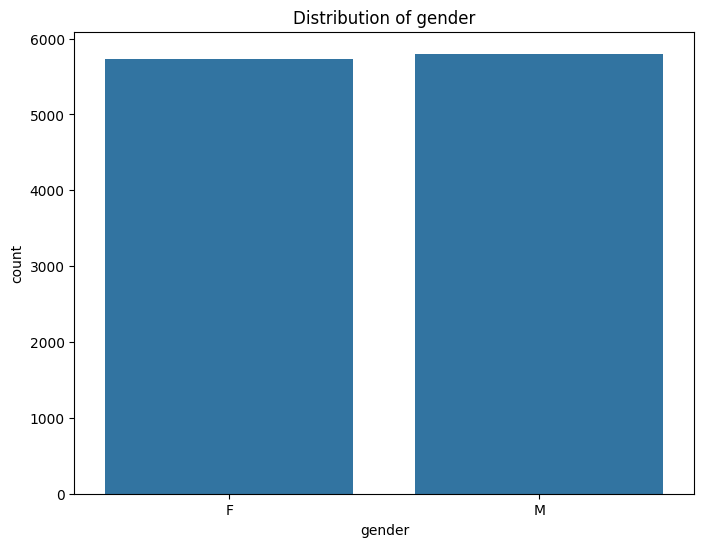

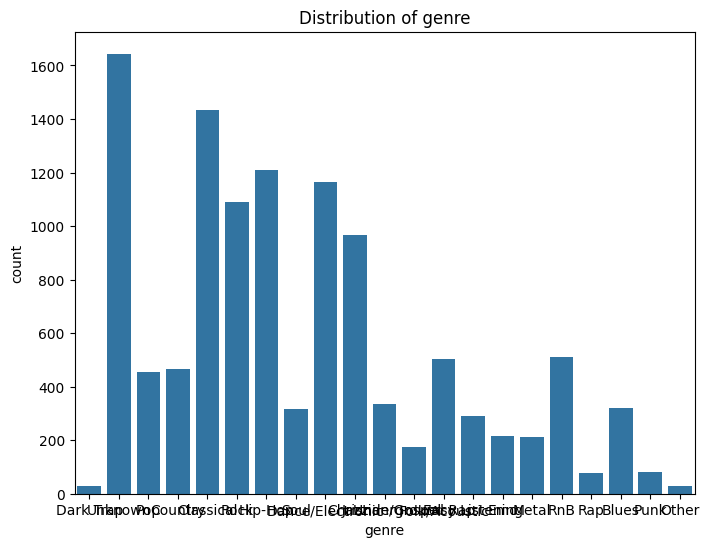

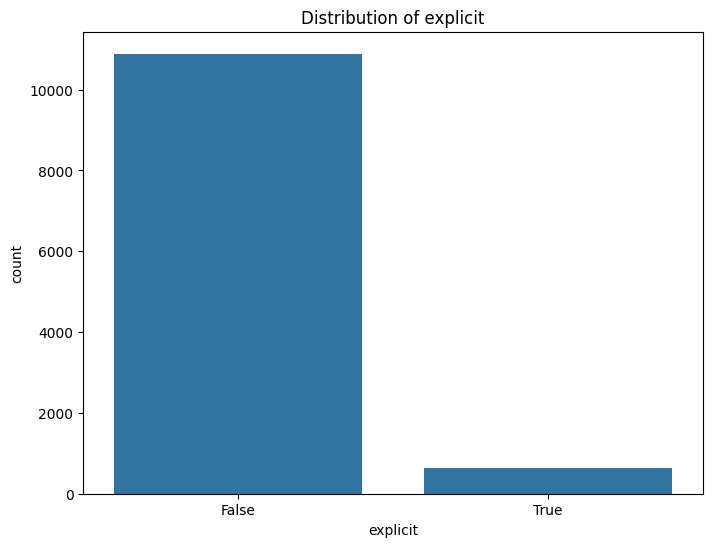

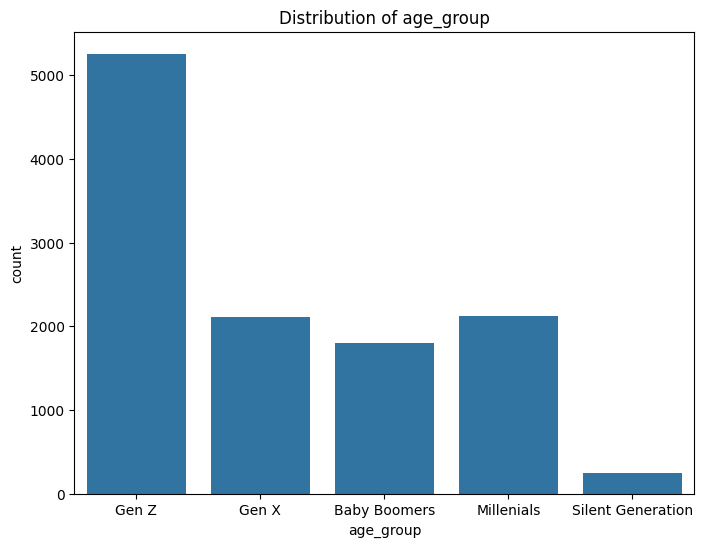


Missing Values in Each Column:
user_id                0
age                    0
gender                 0
music                  0
artist_name            0
featured_artists    7425
genre                  0
plays                  0
duration               0
music_id               0
id_artists             0
acousticness           0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
release_date           0
explicit               0
age_group              0
release_year           0
new_user_id            0
hashed_user_id         0
dtype: int64

Data after handling missing values:
   user_id  age  ... new_user_id                                     hashed_user_id
0    83811   16  ...           1  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1    83811   16  ...     

/tmp/ipykernel_2177/325789888.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].replace('Unknown', 'Other', inplace=True)
/tmp/ipykernel_2177/325789888.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import logging
from datetime import datetime

# Set up logging
logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(message)s"
)


# Step 1: Check for unique music_ids
unique_music_ids = df["music_id"].nunique()
total_rows = len(df)
if unique_music_ids != total_rows:
    logging.warning(
        f"Mismatch in music_ids: Expected {total_rows} unique IDs but found {unique_music_ids}"
    )
    # Assuming we need to rehash music_ids
    df["music_id"] = df["music"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
    logging.info("Rehashed music_ids to ensure uniqueness.")
else:
    logging.info("All music_ids are unique.")

# Debug: Show the updated data after rehashing music_ids (if needed)
print("\nData after music_id rehashing:")
print(df.head())

# Step 2: Restructure user_ids
unique_users = df["user_id"].unique()
user_id_mapping = {
    old_id: new_id for new_id, old_id in enumerate(unique_users, start=1)
}

# Apply the mapping to create new user_ids
df["new_user_id"] = df["user_id"].map(user_id_mapping)

# Debug: Show the updated data after restructuring user_ids
print("\nData after user_id restructuration:")
print(df.head())


# Optional Step 3: Hash new_user_ids for robustness
def hash_user_id(user_id):
    return hashlib.sha256(str(user_id).encode()).hexdigest()


df["hashed_user_id"] = df["new_user_id"].apply(hash_user_id)

# Debug: Show the final data after hashing user_ids (if needed)
print("\nFinal data after hashing user_ids:")
print(df.head())

# Step 4: Check for class imbalances
categorical_columns = ["gender", "genre", "explicit", "age_group"]

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.show()

# Step 5: Handle missing values
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Handle missing values in 'genre' and 'featured_artists'
# Example: Fill 'Unknown' with 'Other'
df["genre"].replace("Unknown", "Other", inplace=True)
df["featured_artists"].fillna("None", inplace=True)

# Debug: Show the updated data after handling missing values
print("\nData after handling missing values:")
print(df.head())

# Step 6: Data Type Conversion
# Convert 'release_date' to datetime
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Debug: Show the updated data types
print("\nData Types after conversion:")
print(df.dtypes)

# Step 7: Data Consistency
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")

# Check for unexpected values in 'release_year'
if (df["release_year"] < 1900).any() or (
    df["release_year"] > datetime.now().year
).any():
    logging.warning("Unexpected values found in 'release_year'.")

# Additional feature engineering can be done here if necessary


Descriptive Statistics for Numeric Columns:
            user_id           age  ...  release_year   new_user_id
count  11528.000000  11528.000000  ...  11528.000000  11528.000000
mean   49598.763706     35.852706  ...   1996.399722   3464.359733
std    28974.476100     19.875979  ...     15.542809   2163.100027
min        4.000000     13.000000  ...   1958.000000      1.000000
25%    24174.000000     18.000000  ...   1988.000000   1549.750000
50%    49120.000000     30.000000  ...   1999.000000   3354.000000
75%    74695.000000     52.000000  ...   2008.000000   5327.250000
max    99998.000000     80.000000  ...   2020.000000   7405.000000

[8 rows x 18 columns]


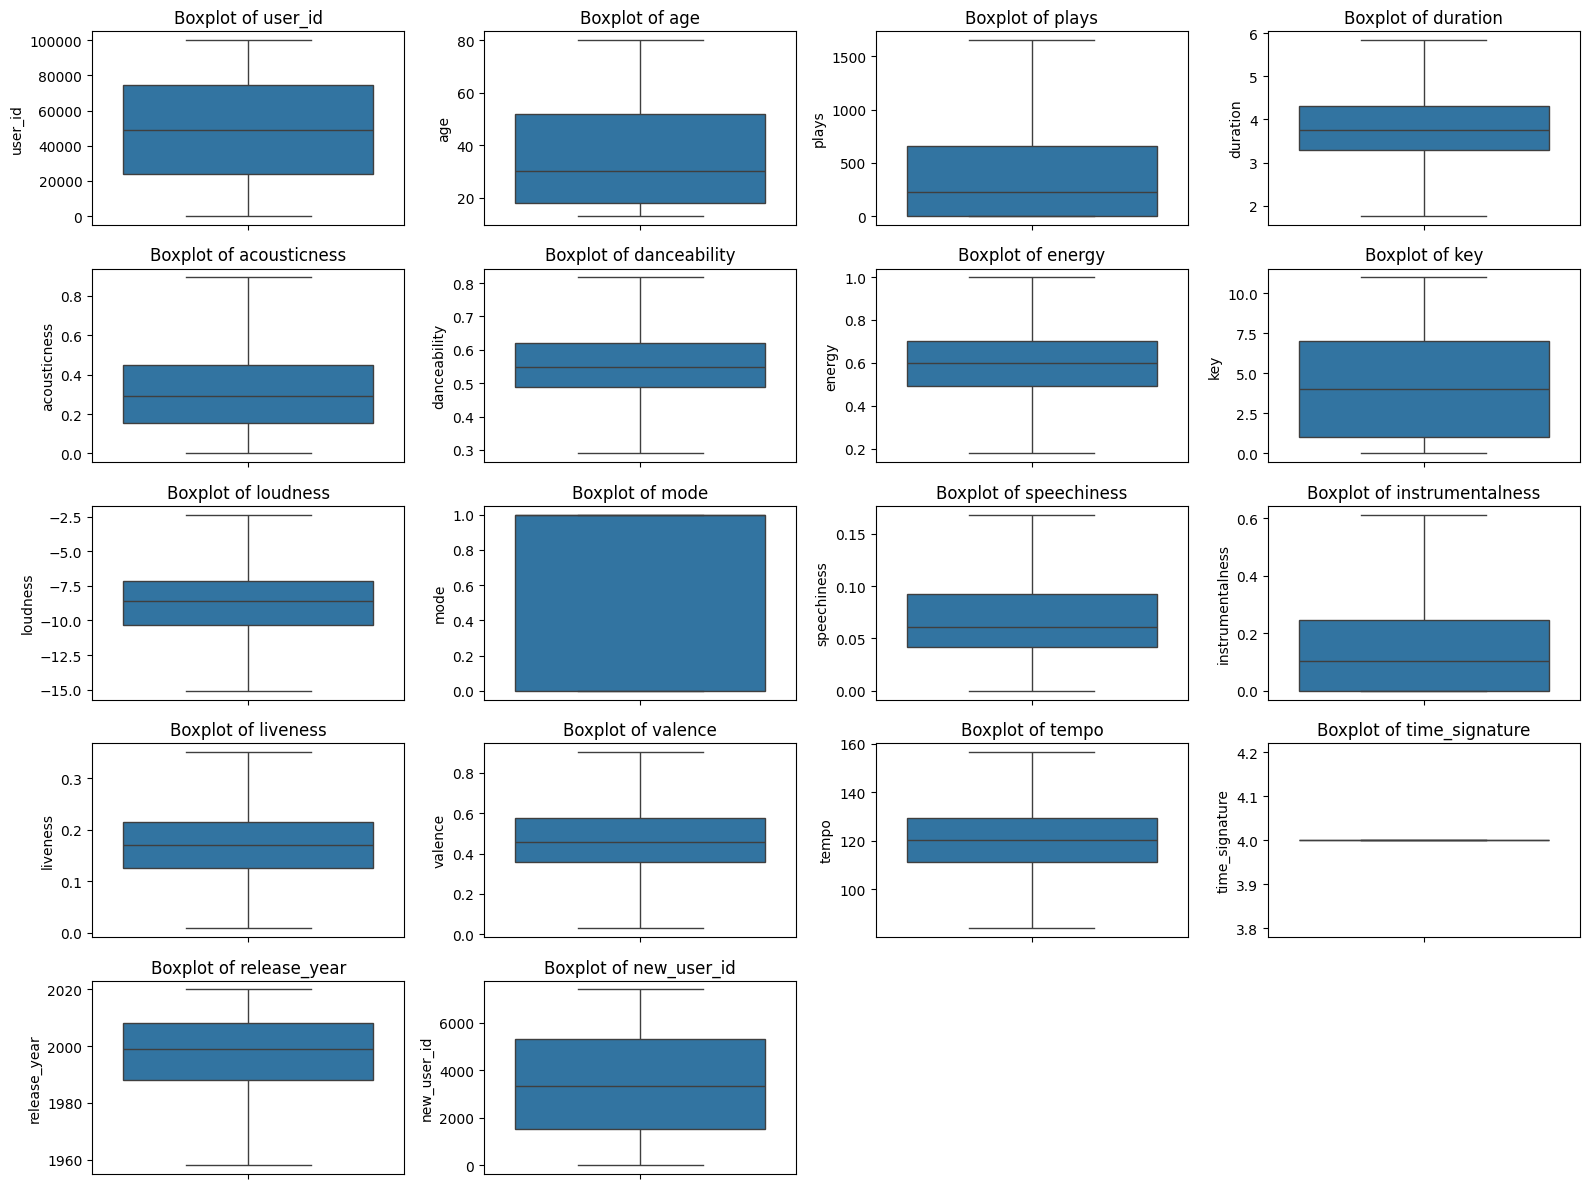

2024-11-19 10:29:37,835 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fbd312afc10>



Correlation Matrix:
                   user_id       age  ...  release_year  new_user_id
user_id           1.000000  0.010383  ...      0.010515     0.008684
age               0.010383  1.000000  ...      0.007196     0.000032
plays            -0.010934 -0.006938  ...      0.005796     0.000655
duration          0.001851 -0.001833  ...      0.006693    -0.017324
acousticness     -0.014670  0.007708  ...     -0.165944     0.010968
danceability     -0.000696 -0.007443  ...      0.153712    -0.044104
energy            0.010404 -0.007011  ...      0.166810     0.002357
key               0.002933  0.003941  ...      0.059375     0.002807
loudness          0.006690 -0.009393  ...      0.298119    -0.022298
mode             -0.003950  0.014938  ...     -0.219141     0.007399
speechiness       0.009620 -0.007211  ...      0.092752    -0.026386
instrumentalness  0.011593  0.004071  ...     -0.094154     0.017422
liveness          0.009887  0.002794  ...     -0.078546     0.004967
valence      

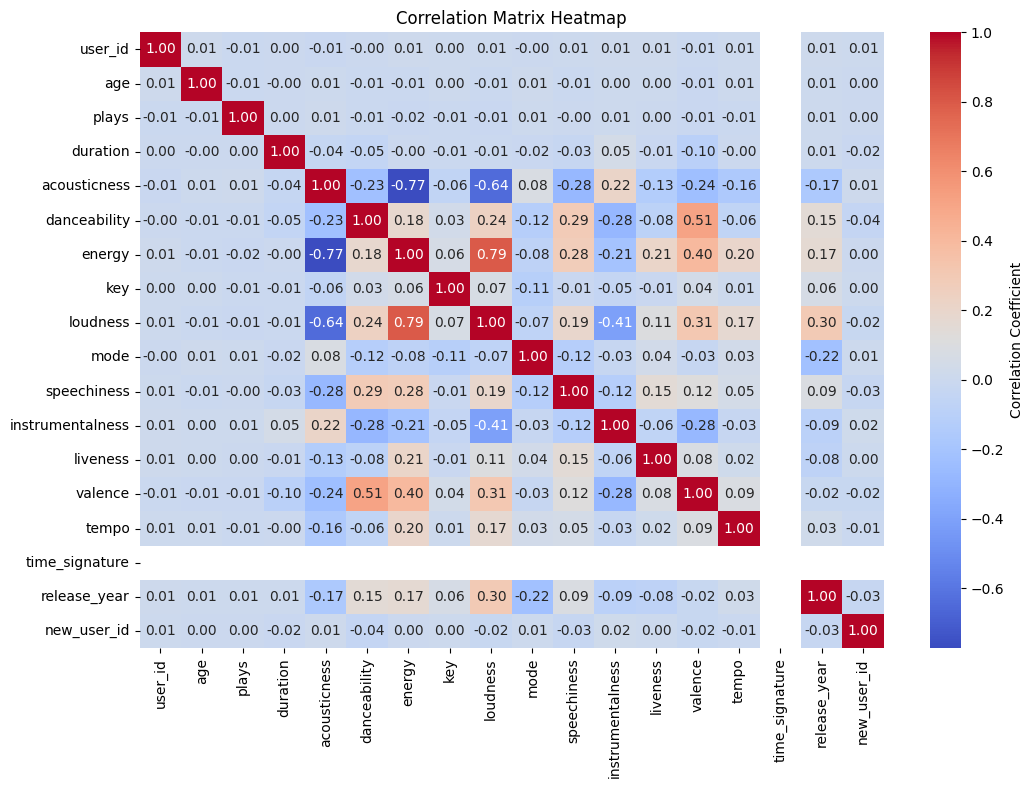


Data after capping outliers:
   user_id  ...                                     hashed_user_id
0  83811.0  ...  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1  83811.0  ...  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2  13397.0  ...  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3  70645.0  ...  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
4  70645.0  ...  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...

[5 rows x 29 columns]


In [ ]:
# Assuming df is already defined and contains the cleaned data from previous steps

# Step 1: Descriptive Statistics
numeric_columns = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_columns].describe()
print("\nDescriptive Statistics for Numeric Columns:")
print(descriptive_stats)

# Step 2: Box Plots
plt.figure(figsize=(16, 12))

# Calculate the number of rows needed
num_columns = len(numeric_columns)
num_rows = (num_columns + 3) // 4  # 4 columns per row

# Plotting box plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Step 3: Correlation Analysis
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Step 4: Outlier Detection Using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Detecting outliers for each numeric column
outliers = {}
for column in numeric_columns:
    outliers[column] = detect_outliers_iqr(df, column)
    if not outliers[column].empty:
        logging.warning(f"Outliers detected in {column}:")
        print(outliers[column])


# Step 5: Handle Outliers (Optional)
# For demonstration, let's handle outliers by capping them at the 1.5*IQR range
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


# Capping outliers for each numeric column
for column in numeric_columns:
    df = cap_outliers_iqr(df, column)

# Debug: Show the updated data after capping outliers
print("\nData after capping outliers:")
print(df.head())

In [ ]:
data.shape, df.shape
print(
    f"Original data shape: {data.shape}\nDataframe shape after processing: {df.shape}"
)

Original data shape: (11528, 27)
Dataframe shape after processing: (11528, 29)


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import RobustScaler

# class MusicPreprocessor:
#     def __init__(self, handle_outliers='robust'):
#         """
#         Initialize the preprocessor

#         Parameters:
#         handle_outliers (str): Strategy for handling outliers
#             'robust': Use RobustScaler
#             'cap': Use IQR-based capping
#             'none': Leave outliers as is
#         """
#         self.handle_outliers = handle_outliers
#         self.scalers = {}

#     def _cap_outliers(self, series):
#         Q1 = series.quantile(0.25)
#         Q3 = series.quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         return np.clip(series, lower_bound, upper_bound)

#     def fit_transform(self, df):
#         """Preprocess the music dataset"""
#         df_processed = df.copy()

#         # 1. Handle temporal features
#         if 'release_year' in df_processed.columns:
#             df_processed['music_age'] = 2024 - df_processed['release_year']

#         # 2. Handle plays (use log transformation due to heavy skew)
#         if 'plays' in df_processed.columns:
#             df_processed['plays_log'] = np.log1p(df_processed['plays'])

#         # 3. Process audio features
#         audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
#                          'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

#         for feature in audio_features:
#             if feature in df_processed.columns:
#                 if self.handle_outliers == 'cap':
#                     df_processed[feature] = self._cap_outliers(df_processed[feature])
#                 elif self.handle_outliers == 'robust':
#                     self.scalers[feature] = RobustScaler()
#                     df_processed[feature] = self.scalers[feature].fit_transform(
#                         df_processed[feature].values.reshape(-1, 1)
#                     )

#         # 4. Create interaction features
#         df_processed['energy_loudness'] = df_processed['energy'] * df_processed['loudness']
#         df_processed['dance_valence'] = df_processed['danceability'] * df_processed['valence']

#         # 5. Drop highly correlated features to reduce multicollinearity
#         # (optional, depending on your model type)
#         high_corr_features = ['loudness']  # Since it's highly correlated with energy
#         df_processed = df_processed.drop(high_corr_features, axis=1)

#         return df_processed

#     def transform(self, df):
#         """Transform new data using fitted preprocessor"""
#         df_processed = df.copy()

#         if 'release_year' in df_processed.columns:
#             df_processed['music_age'] = 2024 - df_processed['release_year']

#         if 'plays' in df_processed.columns:
#             df_processed['plays_log'] = np.log1p(df_processed['plays'])

#         for feature, scaler in self.scalers.items():
#             if feature in df_processed.columns:
#                 df_processed[feature] = scaler.transform(
#                     df_processed[feature].values.reshape(-1, 1)
#                 )

#         df_processed['energy_loudness'] = df_processed['energy'] * df_processed['loudness']
#         df_processed['dance_valence'] = df_processed['danceability'] * df_processed['valence']

#         return df_processed.drop(['loudness'], axis=1)

# # Assuming df is already defined and contains the cleaned data from previous steps

# # Initialize the preprocessor with 'robust' outlier handling
# preprocessor = MusicPreprocessor(handle_outliers='robust')

# # Fit and transform the data
# df_processed = preprocessor.fit_transform(df)

# # Show the processed data
# df_processed.head()

,user_id,age,gender,music,artist_name,featured_artists,genre,plays,duration,music_id,id_artists,acousticness,danceability,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,release_date,explicit,age_group,release_year,new_user_id,hashed_user_id,music_age,plays_log,energy_loudness,dance_valence
0,83811.0,16.0,F,Bank Account,21 Savage,"Birdy, Zoé",Dark Trap,11.0,3.67,2fQrGHiQOvpL9UgPvtYy6G,spotify:artist:1URnnhqYAYcrqrcwql10ft,-0.943857,2.044239,-1.223198,8.0,0.0,2.125413,-0.426145,-0.926775,-0.378168,-2.006201,4.0,2017-09-23,True,Gen Z,2017.0,1.0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,7.0,2.484907,-0.133430,-0.773066
1,83811.0,16.0,F,Little Talks,Of Monsters and Men,"Ninho, Snoop Dogg, Russ, Paramore",Other,686.0,4.44,2ihCaVdNZmnHZWt0fvAM7B,spotify:artist:4dwdTW1Lfiq0cM8nBAqIIz,-0.382217,0.227855,-0.498958,1.0,1.0,-0.571015,-0.426173,1.266450,-0.208452,-1.022969,4.0,2013-04-12,False,Gen Z,2013.0,1.0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,11.0,6.532334,-0.109144,-0.047497
2,13397.0,17.0,M,Wherever I Go,OneRepublic,"Keith Urban, DJ Khaled, NIKI, MF DOOM",Other,136.0,2.83,46jLy47W8rkf8rEX04gMKB,spotify:artist:5Pwc4xIPtQLFEnJriah9YJ,0.236625,0.160849,0.201380,0.0,1.0,0.563905,-0.248427,1.140159,-0.248893,0.023497,4.0,2009-02-03,False,Gen Z,2009.0,2.0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,15.0,4.919981,0.077851,-0.040034
3,70645.0,44.0,M,No New Friends,DJ Khaled,"The xx, LIT killah",Pop,230.0,5.14,5oVlbbiKGdGeZkWCFy0mqk,spotify:artist:0QHgL1lAIqAw0HtD7YldmP,1.295585,2.044239,-0.874224,1.0,1.0,2.103588,-0.426173,-0.821225,-0.268082,-0.614952,4.0,2017-01-01,False,Gen X,2017.0,3.0,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.0,5.442418,-0.266223,-0.548023
4,70645.0,44.0,M,Dreams,Campsite Dream,None,Country,391.0,3.20,1SNoSoQ3JZldOhzBY9gw0n,spotify:artist:69VkQLf4DH7GJ68BCDOPKL,0.223035,-0.221755,-0.276449,0.0,1.0,0.354318,0.537719,0.109329,-0.356081,0.003516,4.0,NaT,False,Gen X,1974.0,3.0,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,50.0,5.971262,0.114615,0.078962


In [15]:
df_processed.shape, df.shape
print(f"Processed data shape: {df_processed.shape}\nOriginal data shape: {df.shape}")

Processed data shape: (11528, 32)
Original data shape: (11528, 29)


2024-11-19 14:49:11,730 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-19 14:49:11,733 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-19 14:49:11,739 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-11-19 14:49:11,741 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-19 14:49:11,742 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-19 14:49:11,744 - DEBUG - findfont: score(FontEntr

   user_id  age gender           music          artist_name  \
0    83811   16      F    Bank Account            21 Savage   
1    83811   16      F    Little Talks  Of Monsters and Men   
2    13397   17      M   Wherever I Go          OneRepublic   
3    70645   44      M  No New Friends            DJ Khaled   
4    70645   44      M          Dreams       Campsite Dream   

                        featured_artists      genre  plays  duration  \
0                             Birdy, Zoé  Dark Trap     11      3.67   
1      Ninho, Snoop Dogg, Russ, Paramore    Unknown    686      4.44   
2  Keith Urban, DJ Khaled, NIKI, MF DOOM    Unknown    136      2.83   
3                     The xx, LIT killah        Pop    230      5.14   
4                                    NaN    Country    391      3.20   

                 music_id  ... release_date  explicit  age_group  \
0  2fQrGHiQOvpL9UgPvtYy6G  ...   2017-09-23      True      Gen Z   
1  2ihCaVdNZmnHZWt0fvAM7B  ...   2013-04-12     Fals

2024-11-19 14:49:12,159 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-11-19 14:49:12,160 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-19 14:49:12,161 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-19 14:49:12,163 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='s

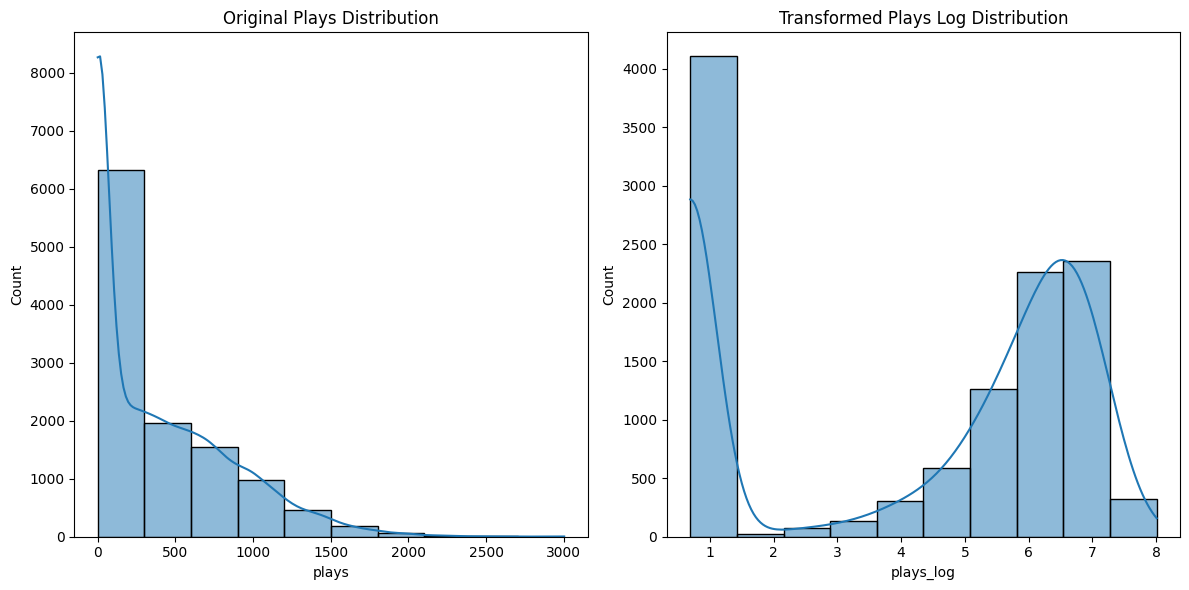

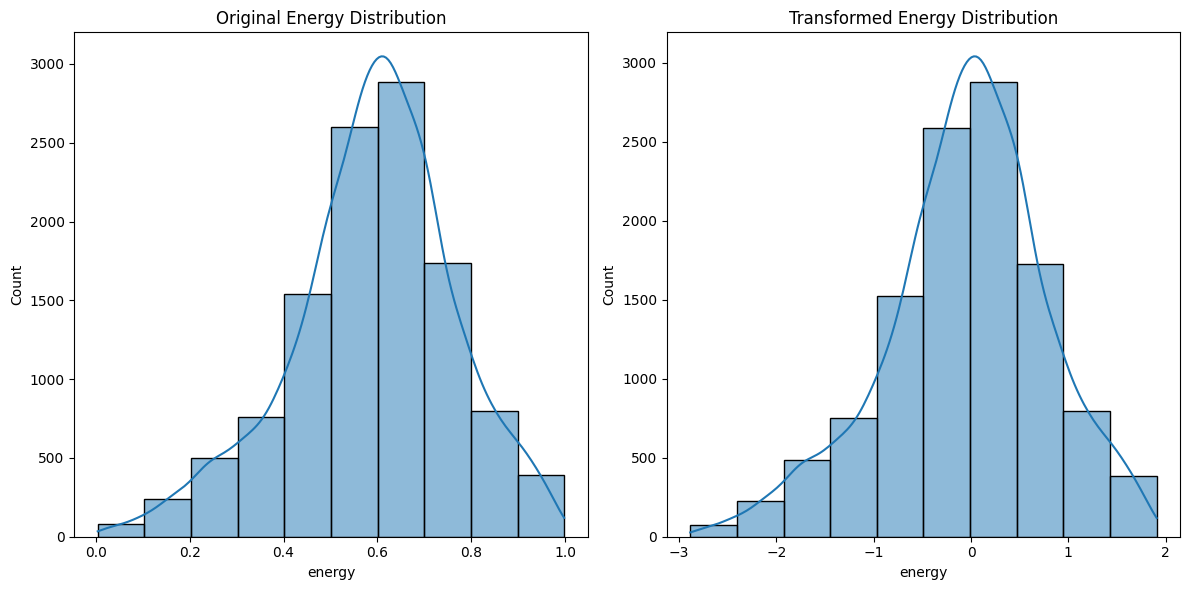

2024-11-19 14:49:13,414 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-19 14:49:13,432 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-19 14:49:13,505 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-19 14:49:13,523 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


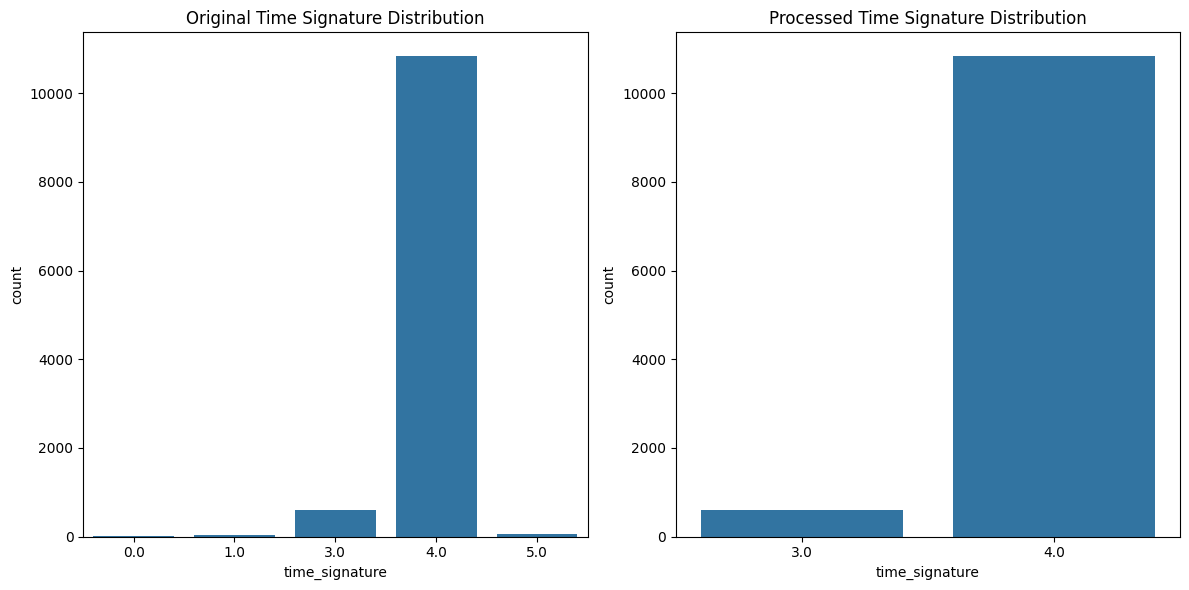

In [ ]:
class MusicPreprocessor:
    def __init__(self, handle_outliers="robust"):
        """
        Initialize the preprocessor

        Parameters:
        handle_outliers (str): Strategy for handling outliers
            'robust': Use RobustScaler
            'cap': Use IQR-based capping
            'none': Leave outliers as is
        """
        self.handle_outliers = handle_outliers
        self.scalers = {}

    def _cap_outliers(self, series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return np.clip(series, lower_bound, upper_bound)

    def _handle_time_signature_outliers(self, df):
        # Example: Filter out time signatures that are not in the expected range
        expected_time_signatures = [3, 4]
        df = df[df["time_signature"].isin(expected_time_signatures)]
        return df

    def fit_transform(self, df):
        """Preprocess the music dataset"""
        df_processed = df.copy()

        # 1. Handle temporal features
        if "release_year" in df_processed.columns:
            df_processed["music_age"] = 2024 - df_processed["release_year"]

        # 2. Handle plays (use log transformation due to heavy skew)
        if "plays" in df_processed.columns:
            df_processed["plays_log"] = np.log1p(df_processed["plays"])

        # 3. Handle time signature outliers
        df_processed = self._handle_time_signature_outliers(df_processed)

        # 4. Process audio features
        audio_features = [
            "acousticness",
            "danceability",
            "energy",
            "instrumentalness",
            "liveness",
            "loudness",
            "speechiness",
            "valence",
            "tempo",
        ]

        for feature in audio_features:
            if feature in df_processed.columns:
                if self.handle_outliers == "cap":
                    df_processed[feature] = self._cap_outliers(df_processed[feature])
                elif self.handle_outliers == "robust":
                    self.scalers[feature] = RobustScaler()
                    df_processed[feature] = self.scalers[feature].fit_transform(
                        df_processed[feature].values.reshape(-1, 1)
                    )

        # 5. Create interaction features
        df_processed["energy_loudness"] = (
            df_processed["energy"] * df_processed["loudness"]
        )
        df_processed["dance_valence"] = (
            df_processed["danceability"] * df_processed["valence"]
        )

        # 6. Drop highly correlated features to reduce multicollinearity
        # (optional, depending on your model type)
        high_corr_features = ["loudness"]  # Since it's highly correlated with energy
        df_processed = df_processed.drop(high_corr_features, axis=1, errors="ignore")

        return df_processed

    def transform(self, df):
        """Transform new data using fitted preprocessor"""
        df_processed = df.copy()

        if "release_year" in df_processed.columns:
            df_processed["music_age"] = 2024 - df_processed["release_year"]

        if "plays" in df_processed.columns:
            df_processed["plays_log"] = np.log1p(df_processed["plays"])

        for feature, scaler in self.scalers.items():
            if feature in df_processed.columns:
                df_processed[feature] = scaler.transform(
                    df_processed[feature].values.reshape(-1, 1)
                )

        df_processed["energy_loudness"] = (
            df_processed["energy"] * df_processed["loudness"]
        )
        df_processed["dance_valence"] = (
            df_processed["danceability"] * df_processed["valence"]
        )

        return df_processed.drop(["loudness"], axis=1, errors="ignore")


# Assuming df is already defined and contains the cleaned data from previous steps

# Initialize the preprocessor with 'robust' outlier handling
preprocessor = MusicPreprocessor(handle_outliers="robust")

# Fit and transform the data
df_processed = preprocessor.fit_transform(df)

# Show the processed data
print(df_processed.head())

# Visualize the distribution before and after transformation
import matplotlib.pyplot as plt
import seaborn as sns

# Original 'plays' distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["plays"], bins=10, kde=True)
plt.title("Original Plays Distribution")

# Transformed 'plays_log' distribution
plt.subplot(1, 2, 2)
sns.histplot(df_processed["plays_log"], bins=10, kde=True)
plt.title("Transformed Plays Log Distribution")

plt.tight_layout()
plt.show()

# Original 'energy' distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["energy"], bins=10, kde=True)
plt.title("Original Energy Distribution")

# Transformed 'energy' distribution
plt.subplot(1, 2, 2)
sns.histplot(df_processed["energy"], bins=10, kde=True)
plt.title("Transformed Energy Distribution")

plt.tight_layout()
plt.show()

# Visualize the distribution of time_signature before and after transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="time_signature", data=df)
plt.title("Original Time Signature Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x="time_signature", data=df_processed)
plt.title("Processed Time Signature Distribution")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Robust Scaled Plays Distribution')

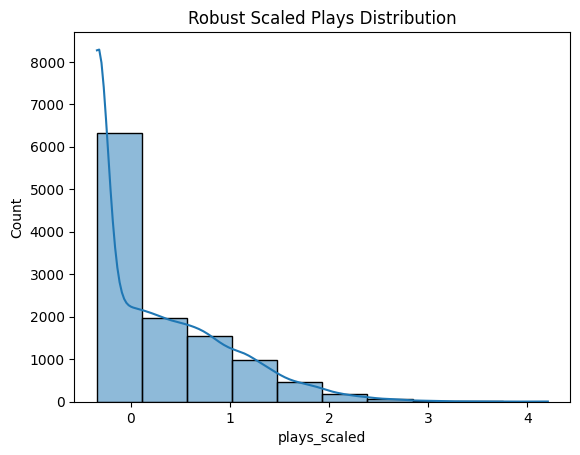

In [ ]:
# use robust scaling on "plays" and plot for visualization using seaborn
scaler = RobustScaler()
df["plays_scaled"] = scaler.fit_transform(df[["plays"]])
sns.histplot(df["plays_scaled"], bins=10, kde=True)
plt.title("Robust Scaled Plays Distribution")

Text(0.5, 1.0, 'Log Transformed Plays Distribution')

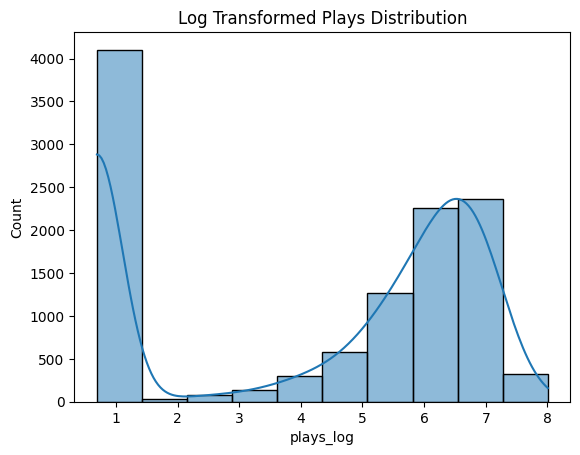

In [ ]:
df_processed["plays_log"]
sns.histplot(df_processed["plays_log"], bins=10, kde=True)
plt.title("Log Transformed Plays Distribution")

In [18]:
df_processed.head()

,user_id,age,gender,music,artist_name,featured_artists,genre,plays,duration,music_id,...,release_date,explicit,age_group,release_year,new_user_id,hashed_user_id,music_age,plays_log,energy_loudness,dance_valence
0,83811,16,F,Bank Account,21 Savage,"Birdy, Zoé",Dark Trap,11,3.67,2fQrGHiQOvpL9UgPvtYy6G,...,2017-09-23,True,Gen Z,2017,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,7,2.484907,-0.132277,-0.972830
1,83811,16,F,Little Talks,Of Monsters and Men,"Ninho, Snoop Dogg, Russ, Paramore",Unknown,686,4.44,2ihCaVdNZmnHZWt0fvAM7B,...,2013-04-12,False,Gen Z,2013,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,11,6.532334,-0.109632,-0.047337
2,13397,17,M,Wherever I Go,OneRepublic,"Keith Urban, DJ Khaled, NIKI, MF DOOM",Unknown,136,2.83,46jLy47W8rkf8rEX04gMKB,...,2009-02-03,False,Gen Z,2009,2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,15,4.919981,0.077155,-0.039519
3,70645,44,M,No New Friends,DJ Khaled,"The xx, LIT killah",Pop,230,5.14,5oVlbbiKGdGeZkWCFy0mqk,...,2017-01-01,False,Gen X,2017,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7,5.442418,-0.267584,-0.607147
4,70645,44,M,Dreams,Campsite Dream,NaN,Country,391,3.20,1SNoSoQ3JZldOhzBY9gw0n,...,1974,False,Gen X,1974,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,50,5.971262,0.117367,0.081196


In [ ]:
# replace user_id with hashed_user_id
df_processed.drop(columns=["user_id"], inplace=True)
df_processed.rename(columns={"hashed_user_id": "user_id"}, inplace=True)

In [ ]:
# handle missing values in 'genre' and 'featured_artists'
df_processed["genre"].replace("Unknown", "Other", inplace=True)
df_processed["featured_artists"].fillna("None", inplace=True)

In [ ]:
# make datframe of all unknown values in 'genre' and 'featured_artists' along with the music
unknown_genre = df_processed[df_processed["genre"] == "Other"]
unknown_artists = df_processed[df_processed["featured_artists"] == "NaN"]
unknown_artists
# unknown_genre

,user_id,age,gender,music,artist_name,featured_artists,genre,plays,duration,music_id,...,release_date,explicit,age_group,release_year,new_user_id,hashed_user_id,music_age,plays_log,energy_loudness,dance_valence


In [61]:
df_processed.columns

Index(['user_id', 'age', 'gender', 'music', 'artist_name', 'featured_artists',
       'genre', 'plays', 'duration', 'music_id', 'id_artists', 'acousticness',
       'danceability', 'energy', 'key', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'release_date', 'explicit', 'age_group', 'release_year', 'new_user_id',
       'hashed_user_id', 'music_age', 'plays_log', 'energy_loudness',
       'dance_valence'],
      dtype='object')

In [ ]:
dance_valence, energy_loudness

In [63]:
mod_data = df_processed.drop(
    columns=[
        "user_id",
        "danceability",
        "energy",
        "valence",
        "plays",
        "new_user_id",
        "age_group",
        "release_date",
        "id_artists",
    ]
)

mod_data.head()

,age,gender,music,artist_name,featured_artists,genre,duration,music_id,acousticness,key,...,liveness,tempo,time_signature,explicit,release_year,hashed_user_id,music_age,plays_log,energy_loudness,dance_valence
0,16,F,Bank Account,21 Savage,"Birdy, Zoé",Dark Trap,3.67,2fQrGHiQOvpL9UgPvtYy6G,-0.955407,8,...,-0.934219,-2.537022,4.0,True,2017,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,7,2.484907,-0.132277,-0.972830
1,16,F,Little Talks,Of Monsters and Men,"Ninho, Snoop Dogg, Russ, Paramore",Unknown,4.44,2ihCaVdNZmnHZWt0fvAM7B,-0.385361,1,...,1.274342,-1.036430,4.0,False,2013,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,11,6.532334,-0.109632,-0.047337
2,17,M,Wherever I Go,OneRepublic,"Keith Urban, DJ Khaled, NIKI, MF DOOM",Unknown,2.83,46jLy47W8rkf8rEX04gMKB,0.242743,0,...,1.147169,0.022241,4.0,False,2009,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,15,4.919981,0.077155,-0.039519
3,44,M,No New Friends,DJ Khaled,"The xx, LIT killah",Pop,5.14,5oVlbbiKGdGeZkWCFy0mqk,1.317553,1,...,-0.827931,-0.623654,4.0,False,2017,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7,5.442418,-0.267584,-0.607147
4,44,M,Dreams,Campsite Dream,NaN,Country,3.20,1SNoSoQ3JZldOhzBY9gw0n,0.228950,0,...,0.109130,0.002027,4.0,False,1974,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,50,5.971262,0.117367,0.081196


In [ ]:
def is_missing(df):
    """ Returns a dataframe of columns with missing values and the number of missing values for each of the columns found """
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    return missing_columns

missing_columns = is_missing(mod_data)
missing_columns

# replace missing values in 'featured_artists' with 'None'
mod_data["featured_artists"].fillna("None", inplace=True)

/tmp/ipykernel_168037/870961012.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mod_data["featured_artists"].fillna("None", inplace=True)


In [68]:
is_missing(mod_data)
mod_data.to_csv("data/engineered_data.csv", index=False)

In [26]:
unknown_genre.shape
# music_list = unknown_genre['music'].tolist()
# music_list

(1633, 32)

In [ ]:
# use spotify api to obtain genre and featured artists
import configparser
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os

# extract credentials from config.ini file
config = configparser.ConfigParser()
config.read("config.ini")
client_id = config["SPOTIFY"]["CLIENT_ID"]
client_secret = config["SPOTIFY"]["CLIENT_SECRET"]

print(f"Client ID: {client_id}\nClient Secret: {client_secret}")


print(
    f"Unknown genres shape : {unknown_genre.shape}\nUnknown artists shape : {unknown_artists.shape}"
)

Client ID: '38887057140440d19bc12f2ca528b38d'
Client Secret: 'bfd8831a9ecd416eb473689a29c010f1'
Unknown genres shape : (1633, 32)
Unknown artists shape : (0, 32)


In [50]:
df_processed.columns

Index(['user_id', 'age', 'gender', 'music', 'artist_name', 'featured_artists',
       'genre', 'plays', 'duration', 'music_id', 'id_artists', 'acousticness',
       'danceability', 'energy', 'key', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'release_date', 'explicit', 'age_group', 'release_year', 'new_user_id',
       'hashed_user_id', 'music_age', 'plays_log', 'energy_loudness',
       'dance_valence'],
      dtype='object')

In [ ]:
import time
from tqdm import tqdm
import logging


class SpotifyGenreFetcher:
    def __init__(self, client_id, client_secret):
        self.sp = spotipy.Spotify(
            auth_manager=SpotifyClientCredentials(
                client_id=client_id, client_secret=client_secret
            )
        )
        self.batch_size = 50
        logging.basicConfig(level=logging.DEBUG)
        self.logger = logging.getLogger(__name__)

    def get_artist_genres(self, artist_id):
        if not isinstance(artist_id, str):
            self.logger.warning(f"Invalid artist ID type: {type(artist_id)}")
            return []
        try:
            artist = self.sp.artist(artist_id)
            return artist["genres"]
        except Exception as e:
            self.logger.error(f"Error fetching genres for artist {artist_id}: {str(e)}")
            return []

    def process_tracks_in_batches(self, unknown_genre_df):
        results = {}

        # Ensure we have valid track IDs
        track_ids = []
        for idx in unknown_genre_df.index:
            if isinstance(idx, str) and idx.strip():
                track_ids.append(idx)
            else:
                self.logger.warning(f"Skipping invalid track ID: {idx}")

        self.logger.info(f"Processing {len(track_ids)} valid track IDs")

        for i in tqdm(range(0, len(track_ids), self.batch_size)):
            batch = track_ids[i : i + self.batch_size]

            try:
                # Debug log the batch
                self.logger.debug(
                    f"Processing batch {i//self.batch_size + 1}: {batch[:5]}..."
                )

                # Get track details
                tracks = self.sp.tracks(batch)["tracks"]

                for track in tracks:
                    if not track:
                        continue

                    try:
                        # Get all artists for the track
                        artist_ids = [
                            artist["id"]
                            for artist in track["artists"]
                            if artist and artist.get("id")
                        ]

                        # Get genres for all artists
                        track_genres = []
                        for artist_id in artist_ids:
                            genres = self.get_artist_genres(artist_id)
                            track_genres.extend(genres)

                        # Store unique genres
                        results[track["id"]] = list(set(track_genres))

                    except Exception as e:
                        self.logger.error(
                            f"Error processing track {track.get('id', 'unknown')}: {str(e)}"
                        )

                time.sleep(0.1)  # Rate limiting

            except Exception as e:
                self.logger.error(f"Batch processing error: {str(e)}")
                continue

        return results


# Usage
fetcher = SpotifyGenreFetcher(client_id, client_secret)
genre_results = fetcher.process_tracks_in_batches(unknown_genre)

# Update DataFrame with new genres
updated_count = 0
for track_id, genres in genre_results.items():
    if track_id in unknown_genre.index:
        unknown_genre.at[track_id, "genre"] = genres[0] if genres else None
        updated_count += 1

print(f"Updated {updated_count} tracks with genres")
print(f"Sample of updated genres:")
print(unknown_genre[unknown_genre["genre"].notna()].head())

In [ ]:
import time
from tqdm import tqdm
import logging


class SpotifyGenreFetcher:
    def __init__(self, client_id, client_secret):
        self.sp = spotipy.Spotify(
            auth_manager=SpotifyClientCredentials(
                client_id=client_id, client_secret=client_secret
            )
        )
        self.batch_size = 50
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

    def get_track_info(self, track_name, artist_name=None):
        try:
            # Search with track name and artist if available
            query = f"track:{track_name}"
            if artist_name:
                query += f" artist:{artist_name}"

            results = self.sp.search(q=query, type="track", limit=1)

            if results["tracks"]["items"]:
                track = results["tracks"]["items"][0]
                artists = track["artists"]

                # Get genres for all artists
                genres = []
                for artist in artists:
                    artist_info = self.sp.artist(artist["id"])
                    genres.extend(artist_info["genres"])

                return list(set(genres))  # Return unique genres
            return []

        except Exception as e:
            self.logger.error(f"Error processing track {track_name}: {str(e)}")
            return []

    def process_tracks(self, unknown_genre_df):
        results = {}

        for idx, row in tqdm(unknown_genre_df.iterrows(), total=len(unknown_genre_df)):
            track_name = row["music"]
            artist_name = row["artist_name"] if "artist_name" in row else None

            if not isinstance(track_name, str):
                continue

            genres = self.get_track_info(track_name, artist_name)
            results[idx] = genres

            # Rate limiting
            time.sleep(0.1)

        return results


# Usage
fetcher = SpotifyGenreFetcher(client_id, client_secret)
genre_results = fetcher.process_tracks(unknown_genre)

# Update DataFrame with new genres
updated_count = 0
for idx, genres in genre_results.items():
    if genres:
        unknown_genre.at[idx, "genre"] = genres[0]  # Take first genre if multiple exist
        updated_count += 1

print(f"Updated {updated_count} tracks with genres")
print("\nSample of updated genres:")
print(unknown_genre[unknown_genre["genre"].notna()].head())

In [ ]:
import time
from tqdm import tqdm
import logging
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


class SpotifyGenreFetcher:
    def __init__(self, client_id, client_secret):
        self.sp = spotipy.Spotify(
            auth_manager=SpotifyClientCredentials(
                client_id=client_id, client_secret=client_secret
            )
        )
        self.batch_size = 50
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

    def get_track_info(self, track_name, artist_name=None):
        try:
            # Search with track name and artist if available
            query = f"track:{track_name}"
            if artist_name:
                query += f" artist:{artist_name}"

            results = self.sp.search(q=query, type="track", limit=1)

            if results["tracks"]["items"]:
                track = results["tracks"]["items"][0]
                artists = track["artists"]

                # Get genres for all artists
                genres = []
                for artist in artists:
                    artist_info = self.sp.artist(artist["id"])
                    genres.extend(artist_info["genres"])

                return list(set(genres))  # Return unique genres
            return []

        except spotipy.exceptions.SpotifyException as e:
            self.logger.error(f"Spotify API error for track {track_name}: {str(e)}")
            return []
        except Exception as e:
            self.logger.error(f"Error processing track {track_name}: {str(e)}")
            return []

    def process_tracks(self, unknown_genre_df):
        results = {}

        for idx, row in tqdm(unknown_genre_df.iterrows(), total=len(unknown_genre_df)):
            track_name = row["music"]
            artist_name = row["artist_name"] if "artist_name" in row else None

            if not isinstance(track_name, str):
                continue

            genres = self.get_track_info(track_name, artist_name)
            results[idx] = genres

            # Rate limiting
            time.sleep(0.1)

        return results


# Usage
fetcher = SpotifyGenreFetcher(client_id, client_secret)
genre_results = fetcher.process_tracks(unknown_genre)

# Update DataFrame with new genres
updated_count = 0
for idx, genres in genre_results.items():
    if genres:
        unknown_genre.at[idx, "genre"] = genres[0]  # Take first genre if multiple exist
        updated_count += 1

print(f"Updated {updated_count} tracks with genres")
print("\nSample of updated genres:")
print(unknown_genre[unknown_genre["genre"].notna()].head())